Filename: ./data/table_4LAC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  4LAC AGNs     1 BinTableHDU    170   2863R x 38C   [18A, E, E, E, E, E, E, E, E, E, 18A, E, E, E, E, E, E, E, I, 6A, 30A, E, E, 20A, D, D, E, 20A, 30A, E, E, 6A, E, E, E, E, E, E]   
None
name:
    ['Source_Name', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 'Signif_Avg', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Index', 'Unc_PL_Index', 'Pivot_Energy', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'Flags', 'CLASS', 'ASSOC1', 'ASSOC_PROB_BAY', 'ASSOC_PROB_LR', 'Counterpart_Catalog', 'RA_Counterpart', 'DEC_Counterpart', 'Unc_Counterpart', 'VLBI_Counterpart', 'Gaia_Counterpart', 'Gaia_G_Magnitude', 'Redshift', 'SED_class', 'nu_syn', 'nuFnu_syn', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Highest_energy']
format:
    ['18A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '18

<ipython-input-1-32edc40c1e47>:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, projection="aitoff")


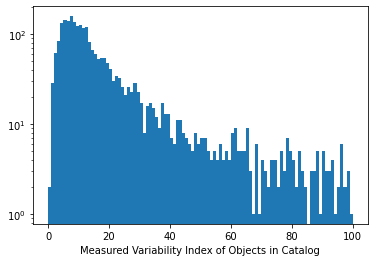

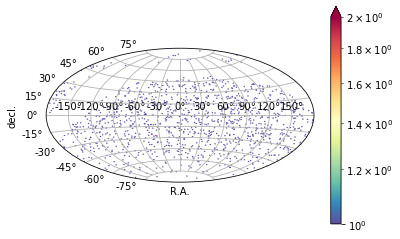

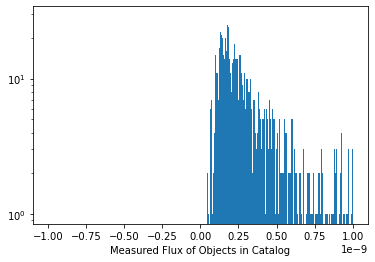

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units


def open_and_convert_catalog(file_name, output_file_name):
    hdul = fits.open(file_name)

    print(hdul.info())
    print(hdul[1].columns.info())

    # Its possible this isn't right, but I think it is
    cat_names = hdul[1].data.field(0).tolist()
    cat_ra = hdul[1].data.field(1).tolist()
    cat_dec = hdul[1].data.field(2).tolist()
    cat_flux1000 = hdul[1].data.field(6).tolist()
    cat_z = hdul[1].data.field(30).tolist()
    cat_type = hdul[1].data.field(19).tolist()
    cat_var_index = hdul[1].data.field(34).tolist()
    sources = set(cat_type)
    np.savez(output_file_name,
             cat_names=cat_names,
             cat_ra=cat_ra,
             cat_dec=cat_dec,
             cat_type=cat_type,
             cat_flux1000=cat_flux1000,
             cat_z=cat_z,
             cat_var_index=cat_var_index)

    
def plot_catalog(file_name):

    catalog_data = np.load(file_name)
    cat_var_index = catalog_data['cat_var_index']
    cat_flux1000 = catalog_data['cat_flux1000']
    cat_ra = catalog_data['cat_ra']
    cat_dec = catalog_data['cat_dec']
    
    plt.figure()
    plt.hist(cat_var_index,
             log=True,
             range=(0.0, 100.0),
             bins=100)
    plt.xlabel("Measured Variability Index of Objects in Catalog")

    plt.figure()
    plt.scatter(cat_ra, cat_dec)
    plt.xlabel("ra")
    plt.ylabel("dec.")

    coords = SkyCoord(ra=cat_ra,
                      dec=cat_dec,
                      unit='degree')
    ra = coords.ra.wrap_at(180 * units.deg).radian
    dec = coords.dec.radian
    color_map = plt.cm.Spectral_r

    ax = plt.subplot(111, projection="aitoff")
    print(len(ra))
    image = ax.hexbin(ra, dec,
                      cmap=color_map,
                      gridsize=512,
                      mincnt=1,
                      bins='log')
    ax.set_xlabel('R.A.')
    ax.set_ylabel('decl.')
    ax.grid(True)
    cbar = plt.colorbar(image, spacing='uniform', extend='max')

    plt.figure()
    plt.hist(cat_flux1000,
             log=True,
             range=(-1.0e-9, 1.0e-9),
             bins=1000)
    plt.xlabel("Measured Flux of Objects in Catalog")

    plt.show()


if(__name__ == "__main__"):

    open_and_convert_catalog("./data/table_4LAC.fits",
                             "./processed_data/4LAC_catelogy.npz")

    plot_catalog("./processed_data/4LAC_catelogy.npz")